# Task 1 Prediction using Supervised ML

1. Predict the of the student based on the number of study hours
2. What will be the predicted score if the student studies for 9.25 hours/day
3. Libraries/Datasets Used: Scikit Learn, matplotlib, seaborn Pandas, Numpy, http://bit.ly/w-data
4. IDE used Jupyter Notebook and language used is Python

5. Task completed during Data Science & Analytics Internship @The Sparks Foundation

                                                         by Mayank Jindal

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Reading Data

In [2]:
data = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


# Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# Checking if there is any null value in the Dataset
data.isnull == True

False

In [6]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

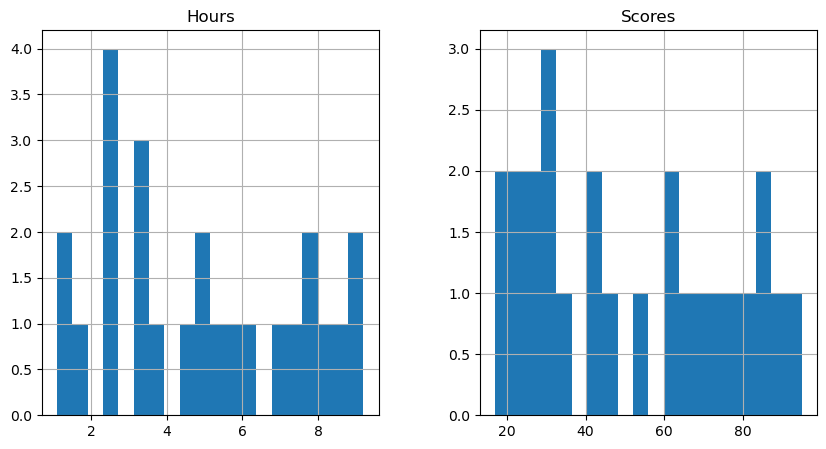

In [7]:
#for plotting histogram
data.hist(bins=20, figsize=(10,5))
plt.show()

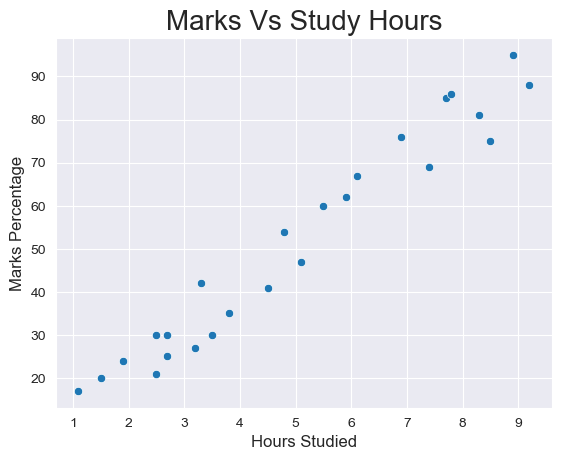

In [8]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

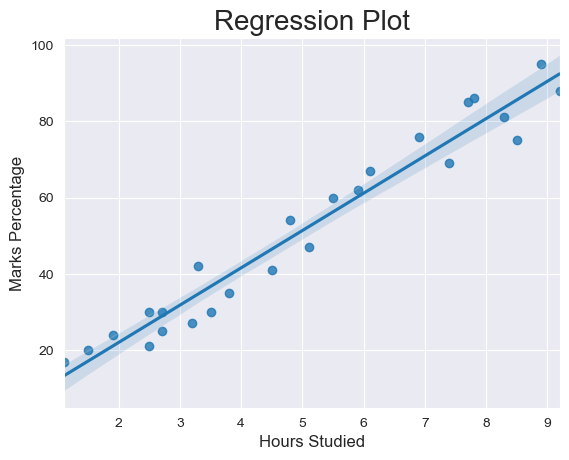

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [9]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

# Training the Model

1) Splitting the Data

In [10]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data into train and test data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

2) Fitting the Data into the model

In [11]:
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression()

# Predicting the Percentage of Marks

In [12]:
predict_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in predict_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Comparing the Predicted Marks with the Actual Marks

In [13]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': predict_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Visually Comparing the Predicted Marks with the Actual Marks

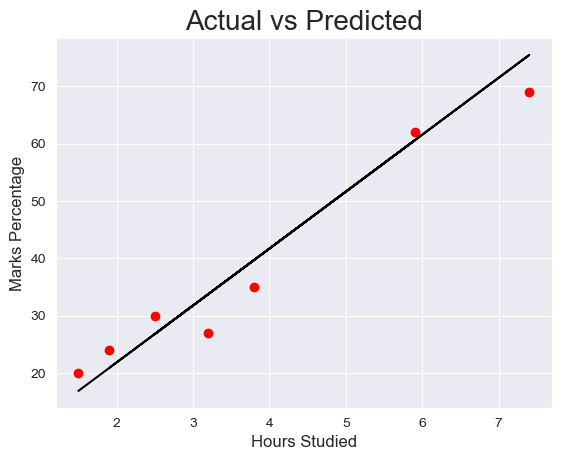

In [14]:
plt.scatter(x=val_X, y=val_y, color='red')
plt.plot(val_X, predict_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Evaluating the Model

In [15]:
print('Mean absolute error: ',mean_absolute_error(val_y,predict_y))

Mean absolute error:  4.130879918502486


Small value of Mean absolute error indicates that the chances of error or wrong prediction through the model are very less.

# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [16]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks or 94 marks after rounding up the result.